In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import random
import pickle5 as pickle

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import *

import cv2
from scipy.ndimage import median_filter
from skimage.transform import resize as sk_resize
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize, thin

In [2]:
fig_size = [8,8]
cmap = 'inferno'

In [3]:
# load data
with open('../data/WM-clean.pkl', "rb") as fh:
    raw_data = pickle.load(fh)
print(f'Raw data shape: {raw_data.shape}')

# remove test set
data = raw_data[raw_data.dataset != 'test'].reset_index(drop=True)
print(f'Train/dev data shape: {data.shape}')
#data.head()

Raw data shape: (172950, 11)
Train/dev data shape: (147007, 11)


In [4]:
# resize images to 60x60
def resize(x):
    y = sk_resize(x, [60,60])
    new_y = img_as_ubyte(y)
    return new_y
    
data['waferMap60'] = data.waferMap.apply(lambda x: resize(x))

In [5]:
def binarize(x):
    ret, thresh_img = cv2.threshold(x, 1, 1, cv2.THRESH_BINARY)
    return thresh_img

data['binaryMap'] = data.waferMap60.apply(lambda x: binarize(x))

In [ ]:
# # add binarized map column
# def binarize(x):
#     im_bool = x == 2
#     im_bin = im_bool * 1
#     return im_bin
    
# data['binaryMap'] = data.waferMap224.apply(lambda x: binarize(x))

In [6]:
data.failureType.unique()

array(['none', 'Loc', 'Edge-Loc', 'Center', 'Scratch', 'Near-full',
       'Random', 'Edge-Ring', 'Donut'], dtype=object)

In [7]:
# picked out "good" and "bad" examples of each failure type
good = [81093, 23883, 146546, 21963, 21504, 81735, 14937, 8777, 17502]
bad = [84792, 19099, 71986, 23280, 123406, 98254, 98185, 17960, 105729]

good_df = data.loc[good]
bad_df = data.loc[bad]

#### Exploring Morphological Thinning

##### Good Examples

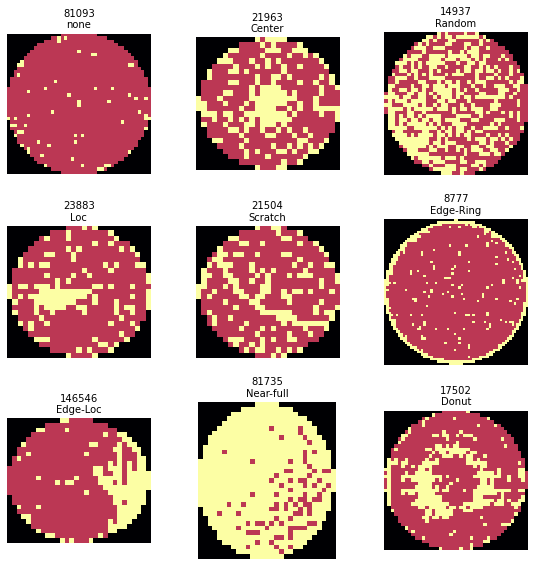

In [8]:
# original data
plot_list(good_df, good, fig_size=fig_size, col='waferMap', cmap=cmap)

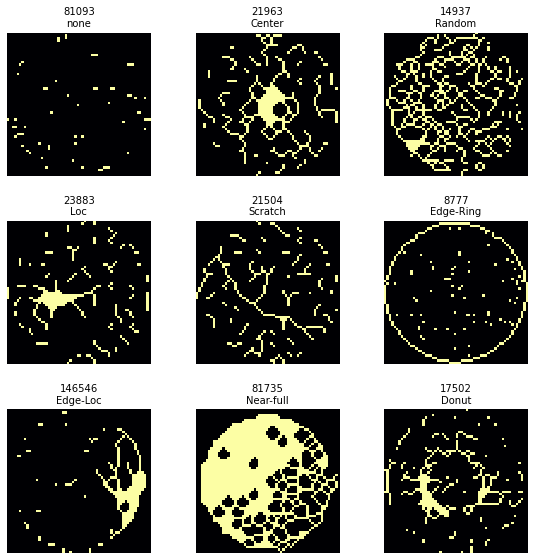

In [9]:
# apply partial thinning
good_df['pthinMap'] = good_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(good_df, good, fig_size=fig_size, col='pthinMap', cmap=cmap)

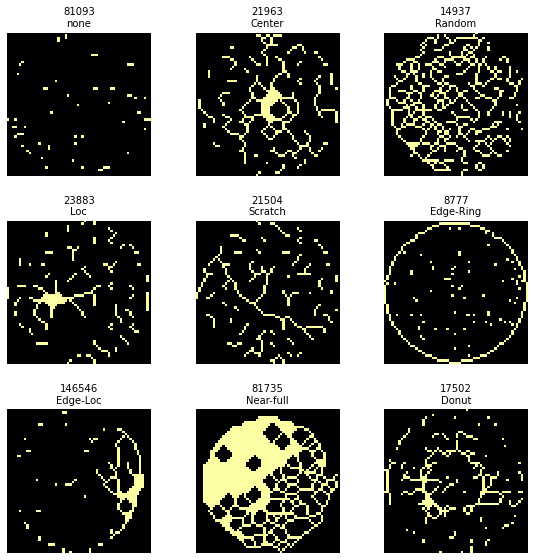

In [53]:
# apply partial thinning
good_df['pthinMap'] = good_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(good_df, good, fig_size=fig_size, col='pthinMap', cmap=cmap)

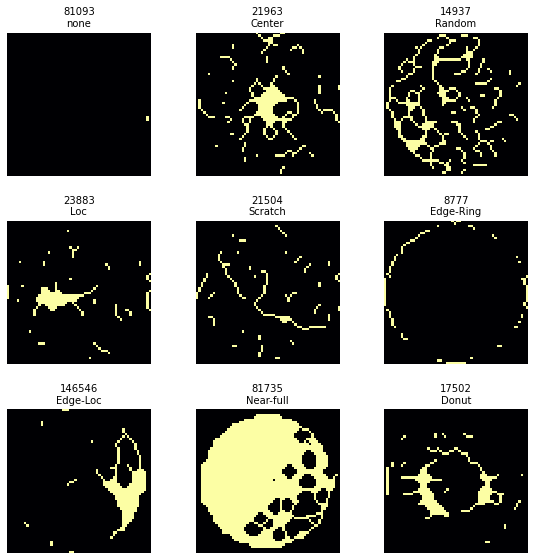

In [54]:
# apply median filter before thinning
good_df['fpthinMap'] = good_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(good_df, good, fig_size=fig_size, col='fpthinMap', cmap=cmap)

##### Bad Examples

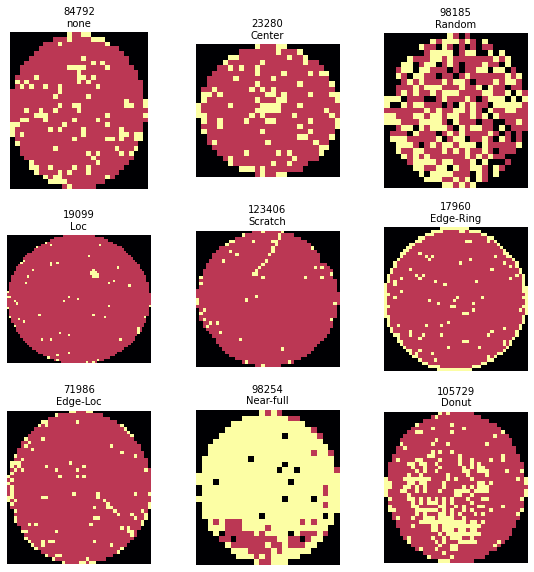

In [12]:
# original data
plot_list(bad_df, bad, fig_size=fig_size, col='waferMap', cmap=cmap)

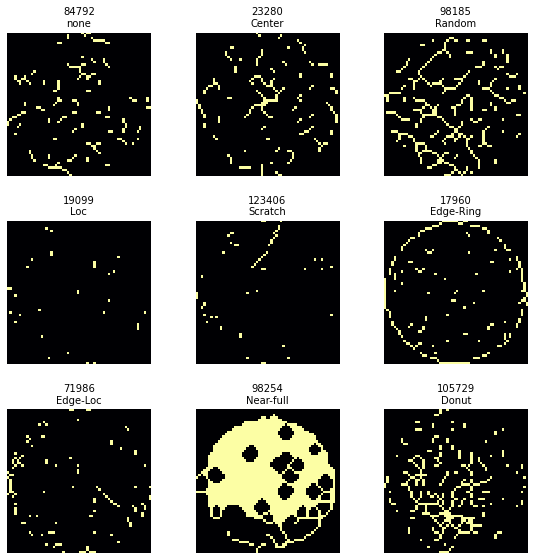

In [13]:
# apply thinning
bad_df['pthinMap'] = bad_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(bad_df, bad, fig_size=fig_size, col='pthinMap', cmap=cmap)

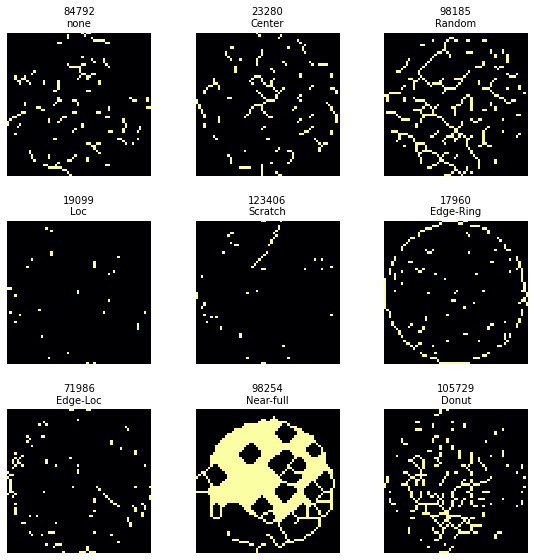

In [55]:
# apply thinning
bad_df['pthinMap'] = bad_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(bad_df, bad, fig_size=fig_size, col='pthinMap', cmap=cmap)

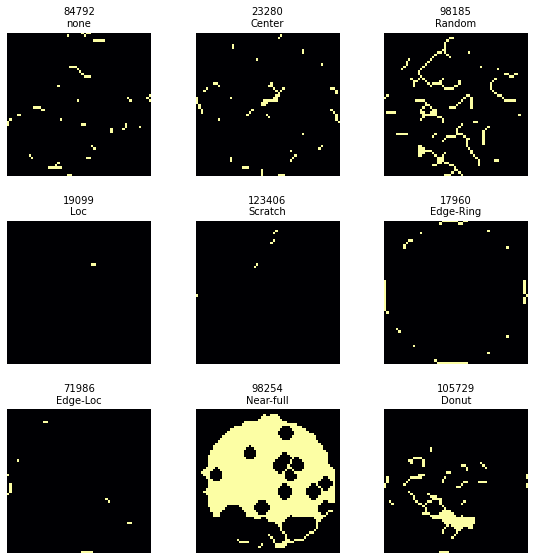

In [56]:
# apply median filter before thinning
bad_df['fpthinMap'] = bad_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(bad_df, bad, fig_size=fig_size, col='fpthinMap', cmap=cmap)

#### Random Examples of Each Failure Type

In [16]:
number = 9

none count: 125316


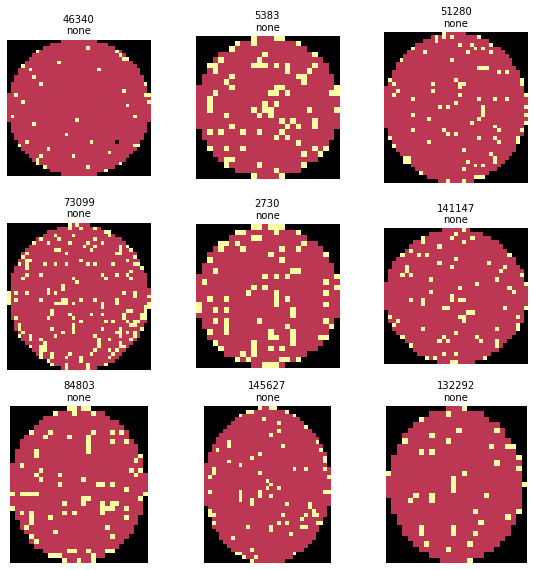

In [17]:
none = data.index[data['failureType'] == 'none'].tolist()
print(f'none count: {len(none)}')
random_none = random.sample(none, number)
none_df = data.loc[random_none]

plot_list(data, random_none, fig_size=fig_size, col='waferMap', cmap=cmap)

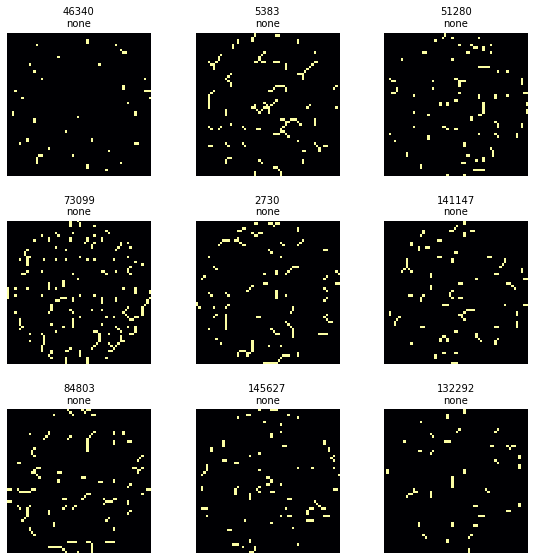

In [18]:
none_df['thinMap'] = none_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(none_df, random_none, fig_size=fig_size, col='thinMap', cmap=cmap)

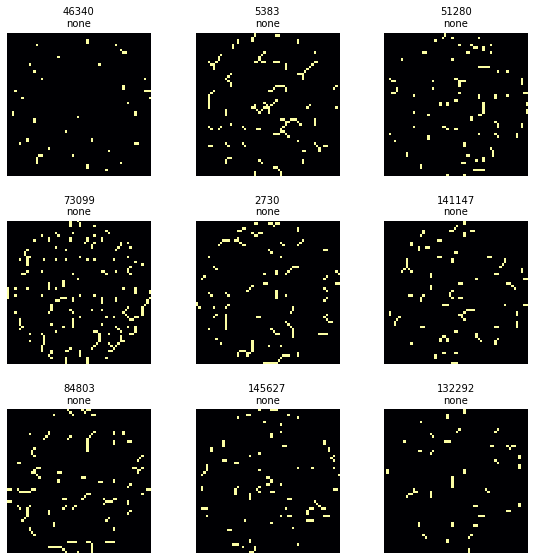

In [57]:
none_df['thinMap'] = none_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(none_df, random_none, fig_size=fig_size, col='thinMap', cmap=cmap)

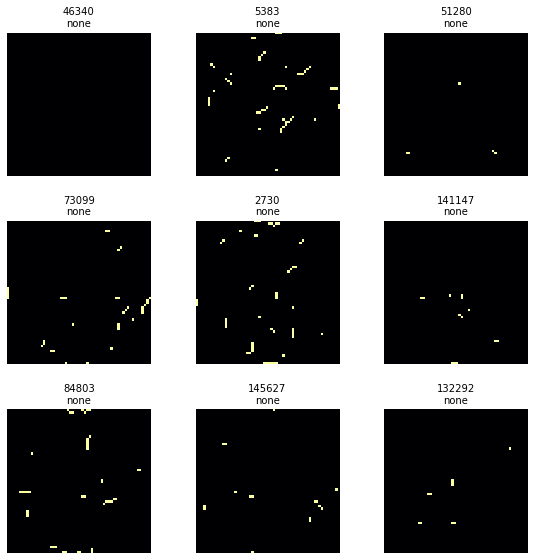

In [58]:
none_df['fpthinMap'] = none_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(none_df, random_none, fig_size=fig_size, col='fpthinMap', cmap=cmap)

Loc count: 3054


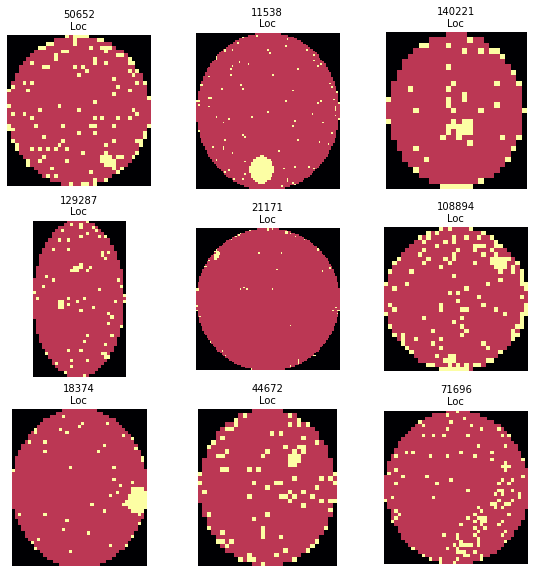

In [21]:
Loc = data.index[data['failureType'] == 'Loc'].tolist()
print(f'Loc count: {len(Loc)}')
random_Loc = random.sample(Loc, number)
Loc_df = data.loc[random_Loc]
 
plot_list(data, random_Loc, fig_size=fig_size, col='waferMap', cmap=cmap)

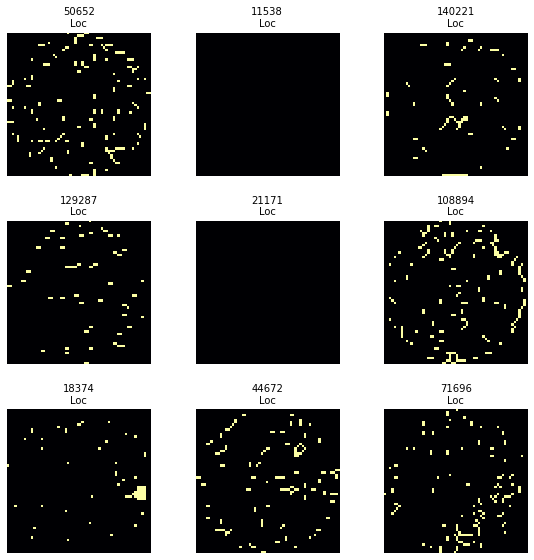

In [22]:
Loc_df['thinMap'] = Loc_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(Loc_df, random_Loc, fig_size=fig_size, col='thinMap', cmap=cmap)

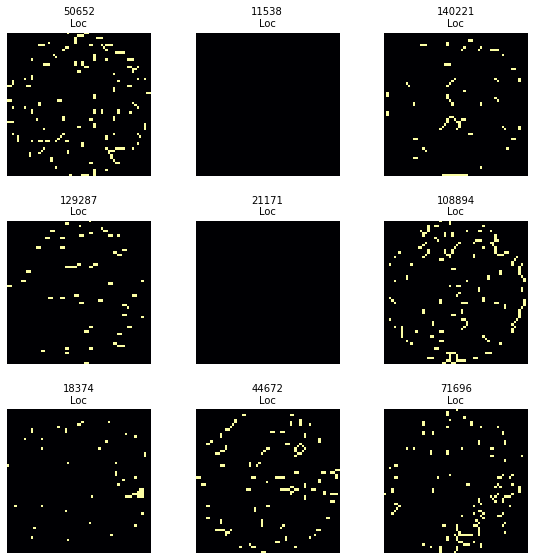

In [59]:
Loc_df['thinMap'] = Loc_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(Loc_df, random_Loc, fig_size=fig_size, col='thinMap', cmap=cmap)

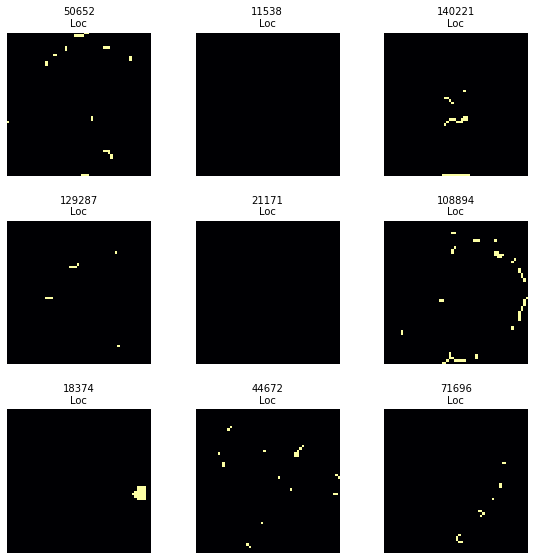

In [60]:
Loc_df['fpthinMap'] = Loc_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(Loc_df, random_Loc, fig_size=fig_size, col='fpthinMap', cmap=cmap)

EL count: 4410


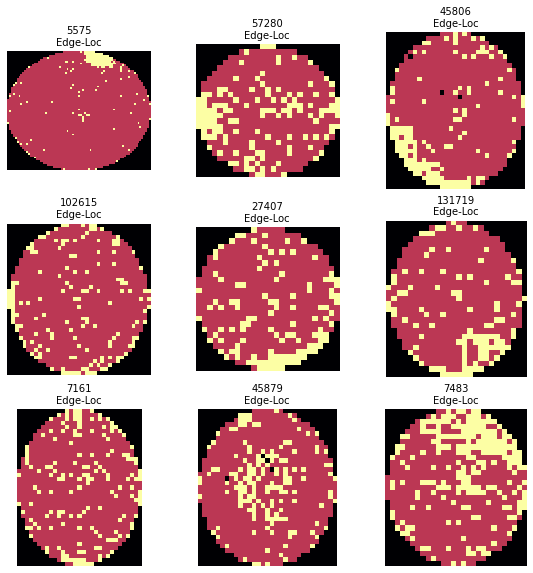

In [62]:
EL = data.index[data['failureType'] == 'Edge-Loc'].tolist()
print(f'EL count: {len(EL)}')
random_EL = random.sample(EL, number)
EL_df = data.loc[random_EL]
 
plot_list(data, random_EL, fig_size=fig_size, col='waferMap', cmap=cmap)

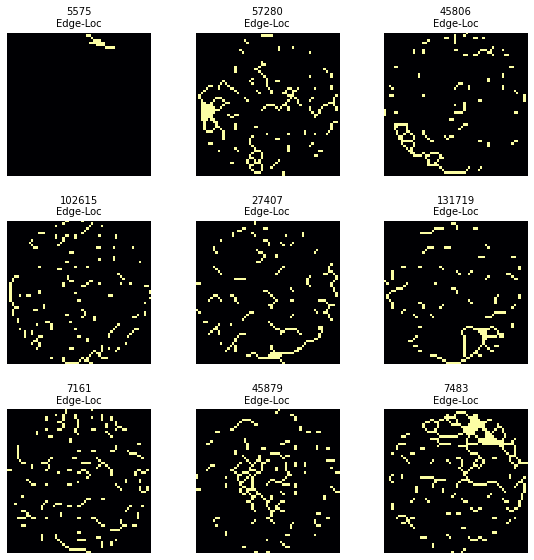

In [63]:
EL_df['thinMap'] = EL_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(EL_df, random_EL, fig_size=fig_size, col='thinMap', cmap=cmap)

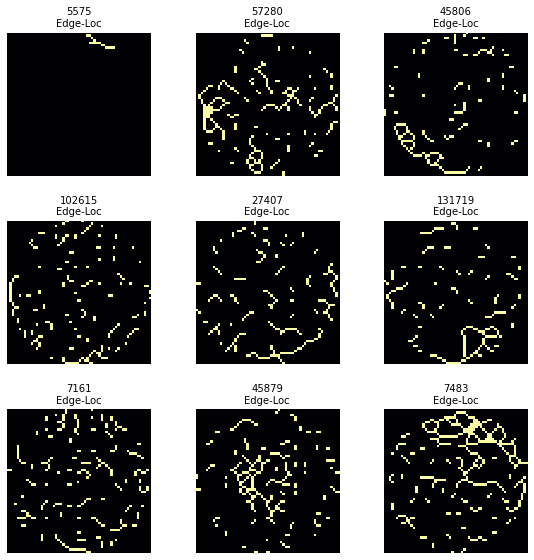

In [64]:
EL_df['thinMap'] = EL_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(EL_df, random_EL, fig_size=fig_size, col='thinMap', cmap=cmap)

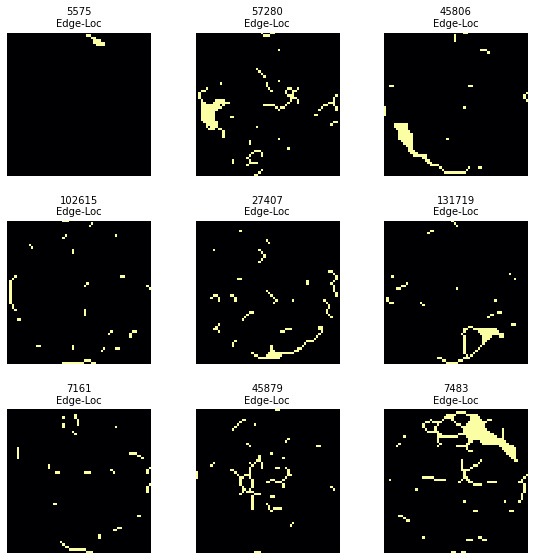

In [66]:
EL_df['fpthinMap'] = EL_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(EL_df, random_EL, fig_size=fig_size, col='fpthinMap', cmap=cmap)

CENTER count: 3650


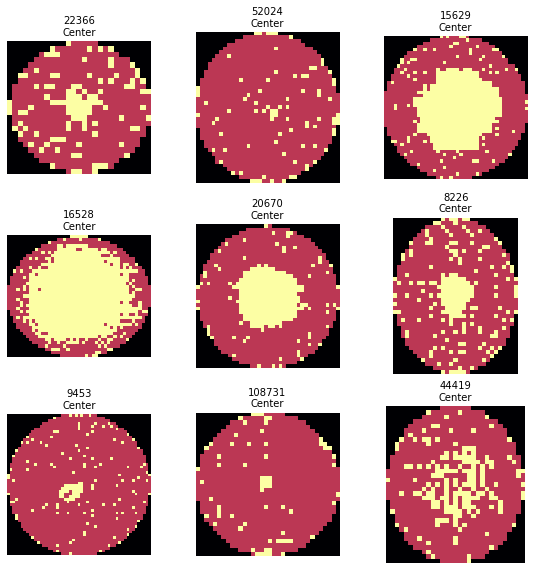

In [29]:
CENTER = data.index[data['failureType'] == 'Center'].tolist()
print(f'CENTER count: {len(CENTER)}')
random_CENTER = random.sample(CENTER, number)
CENTER_df = data.loc[random_CENTER]
 
plot_list(data, random_CENTER, fig_size=fig_size, col='waferMap', cmap=cmap)

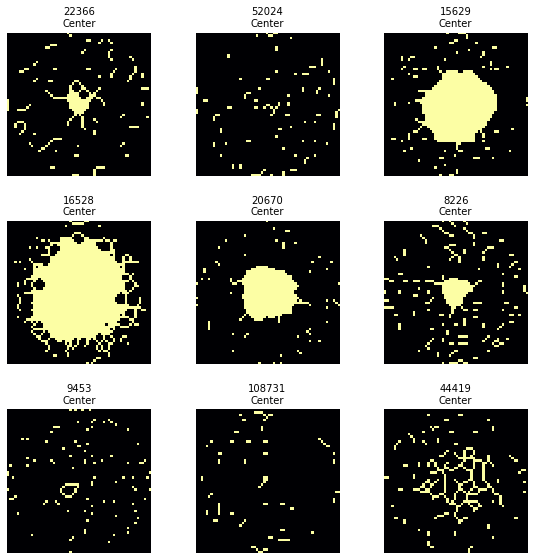

In [30]:
CENTER_df['thinMap'] = CENTER_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(CENTER_df, random_CENTER, fig_size=fig_size, col='thinMap', cmap=cmap)

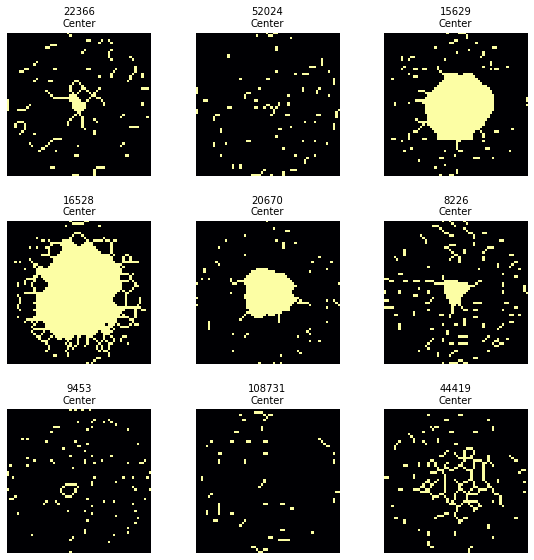

In [67]:
CENTER_df['thinMap'] = CENTER_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(CENTER_df, random_CENTER, fig_size=fig_size, col='thinMap', cmap=cmap)

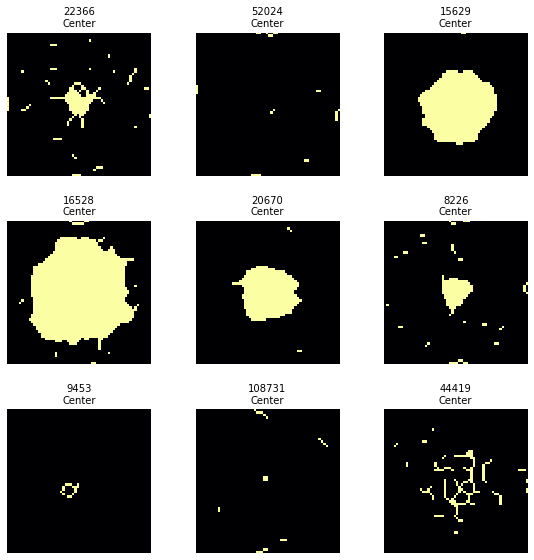

In [68]:
CENTER_df['fpthinMap'] = CENTER_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(CENTER_df, random_CENTER, fig_size=fig_size, col='fpthinMap', cmap=cmap)

ER count: 8228


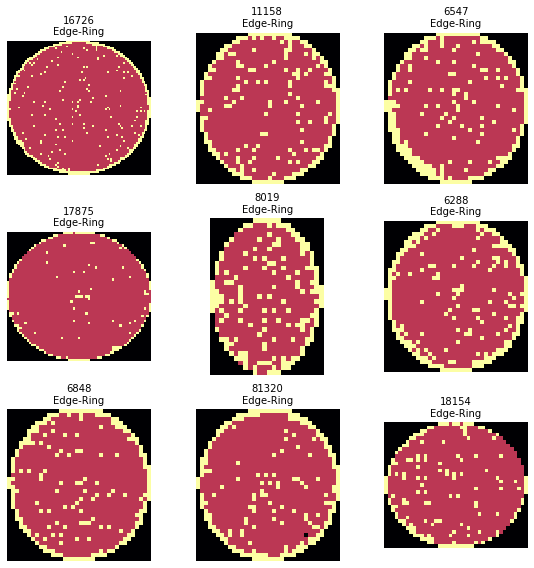

In [33]:
ER = data.index[data['failureType'] == 'Edge-Ring'].tolist()
print(f'ER count: {len(ER)}')
random_ER = random.sample(ER, number)
ER_df = data.loc[random_ER]
 
plot_list(data, random_ER, fig_size=fig_size, col='waferMap', cmap=cmap)

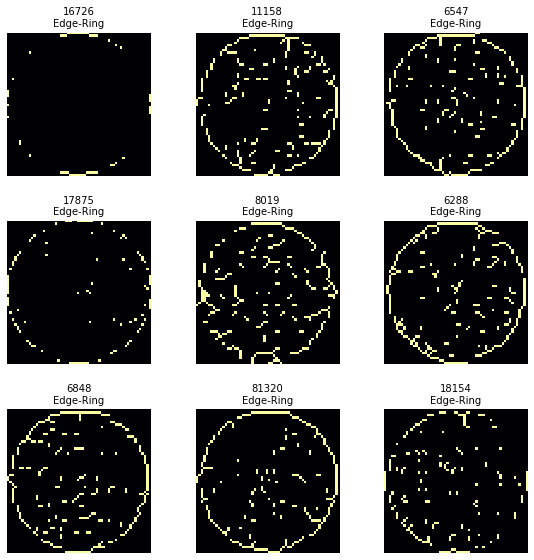

In [69]:
ER_df['thinMap'] = ER_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(ER_df, random_ER, fig_size=fig_size, col='thinMap', cmap=cmap)

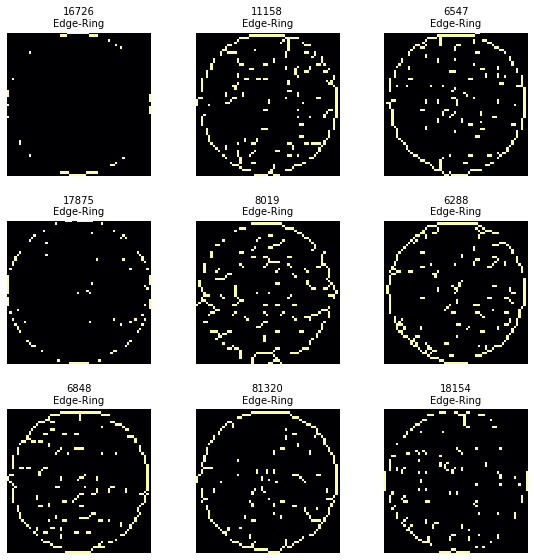

In [70]:
ER_df['thinMap'] = ER_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(ER_df, random_ER, fig_size=fig_size, col='thinMap', cmap=cmap)

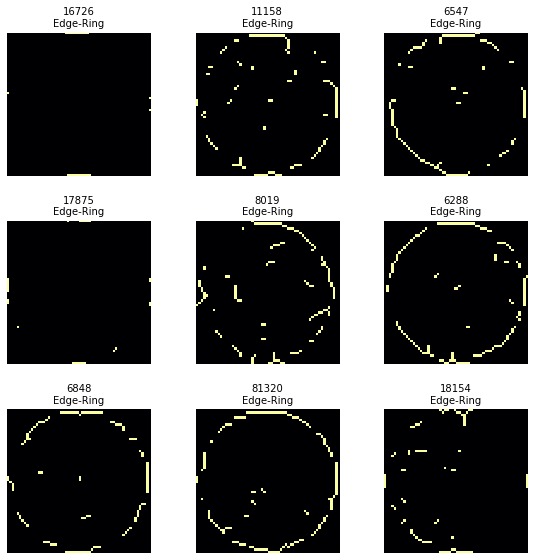

In [71]:
ER_df['fpthinMap'] = ER_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 3))
plot_list(ER_df, random_ER, fig_size=fig_size, col='fpthinMap', cmap=cmap)

SCRATCH count: 1014


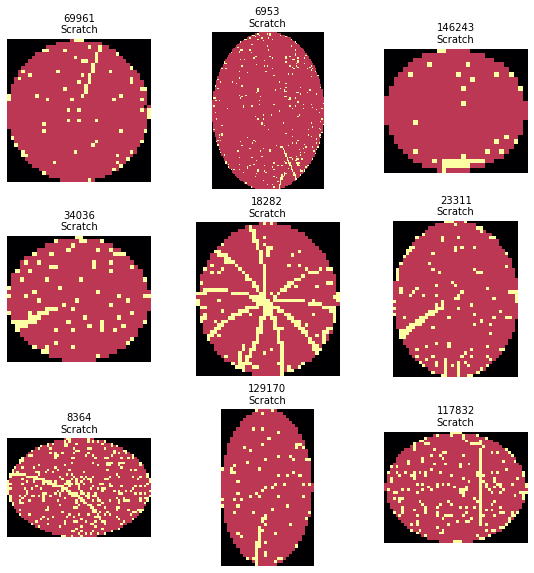

In [37]:
SCRATCH = data.index[data['failureType'] == 'Scratch'].tolist()
print(f'SCRATCH count: {len(SCRATCH)}')
random_SCRATCH = random.sample(SCRATCH, number)
SCRATCH_df = data.loc[random_SCRATCH]
 
plot_list(data, random_SCRATCH, fig_size=fig_size, col='waferMap', cmap=cmap)

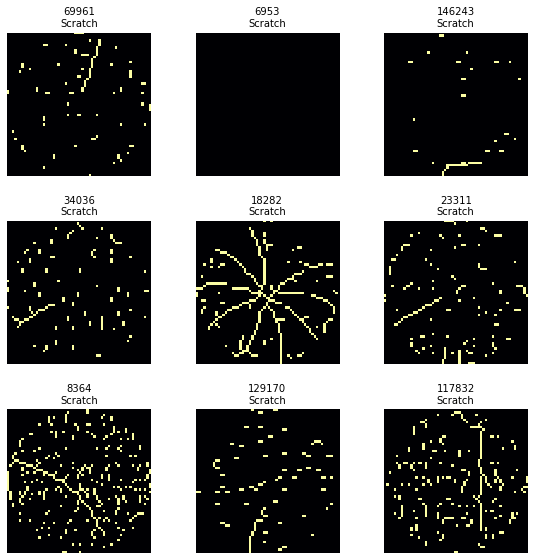

In [38]:
SCRATCH_df['thinMap'] = SCRATCH_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(SCRATCH_df, random_SCRATCH, fig_size=fig_size, col='thinMap', cmap=cmap)

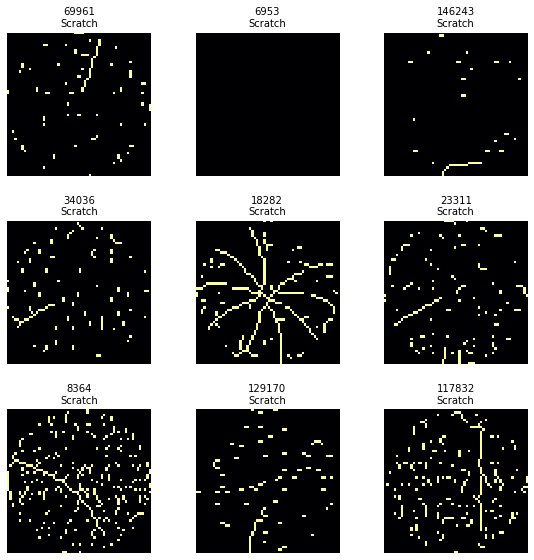

In [72]:
SCRATCH_df['thinMap'] = SCRATCH_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(SCRATCH_df, random_SCRATCH, fig_size=fig_size, col='thinMap', cmap=cmap)

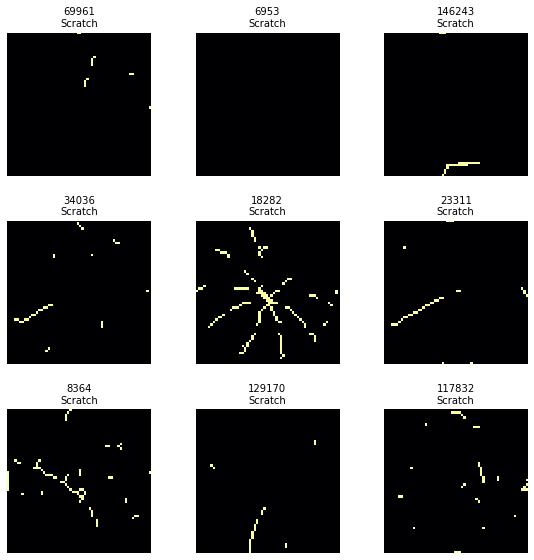

In [73]:
SCRATCH_df['fpthinMap'] = SCRATCH_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(SCRATCH_df, random_SCRATCH, fig_size=fig_size, col='fpthinMap', cmap=cmap)

rand count: 736


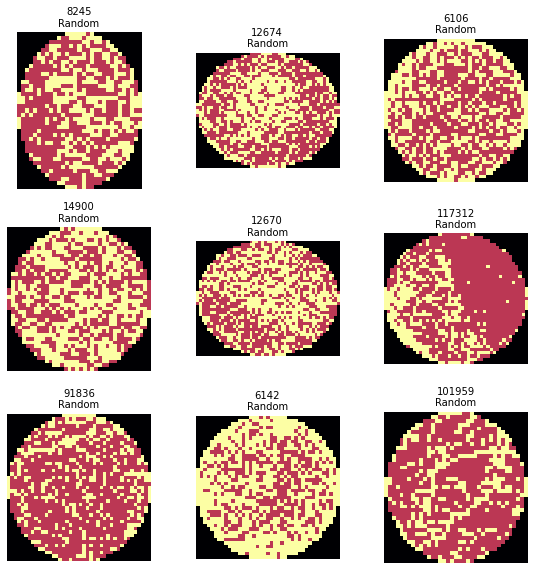

In [41]:
rand = data.index[data['failureType'] == 'Random'].tolist()
print(f'rand count: {len(rand)}')
random_rand = random.sample(rand, number)
rand_df = data.loc[random_rand]

plot_list(data, random_rand, fig_size=fig_size, col='waferMap', cmap=cmap)

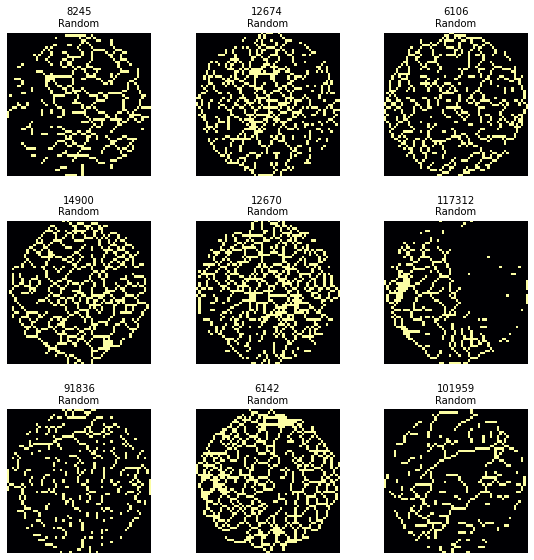

In [42]:
rand_df['thinMap'] = rand_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(rand_df, random_rand, fig_size=fig_size, col='thinMap', cmap=cmap)

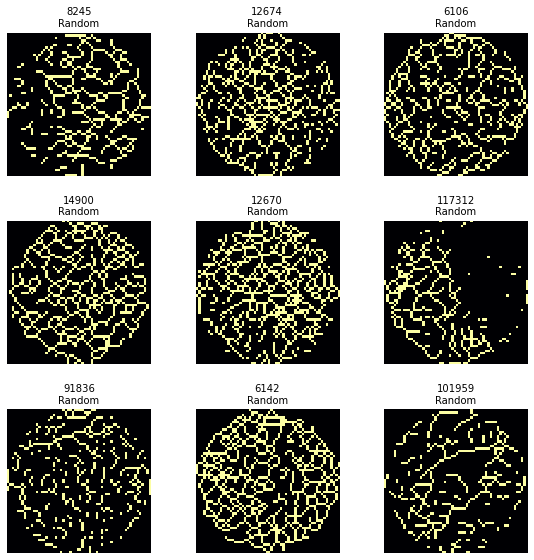

In [74]:
rand_df['thinMap'] = rand_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(rand_df, random_rand, fig_size=fig_size, col='thinMap', cmap=cmap)

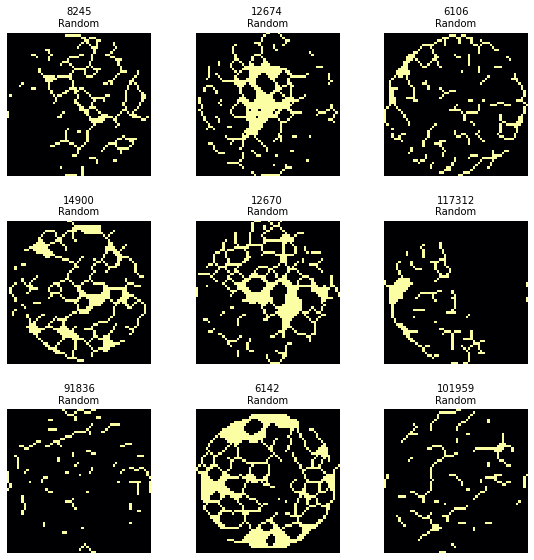

In [75]:
rand_df['fpthinMap'] = rand_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(rand_df, random_rand, fig_size=fig_size, col='fpthinMap', cmap=cmap)

NF count: 127


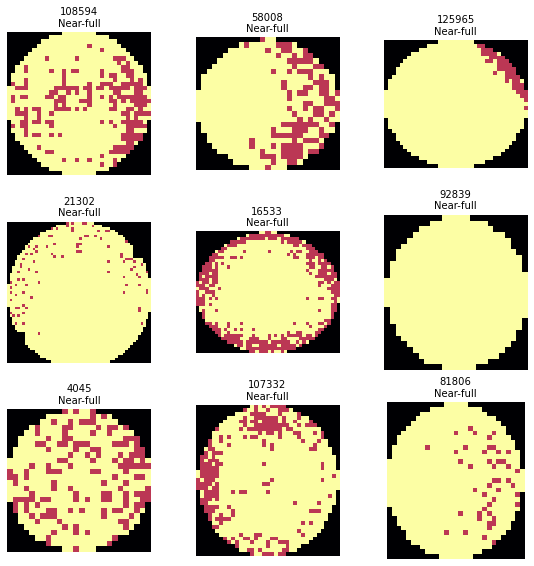

In [45]:
NF = data.index[data['failureType'] == 'Near-full'].tolist()
print(f'NF count: {len(NF)}')
random_NF = random.sample(NF, number)
NF_df = data.loc[random_NF]

plot_list(data, random_NF, fig_size=fig_size, col='waferMap', cmap=cmap)

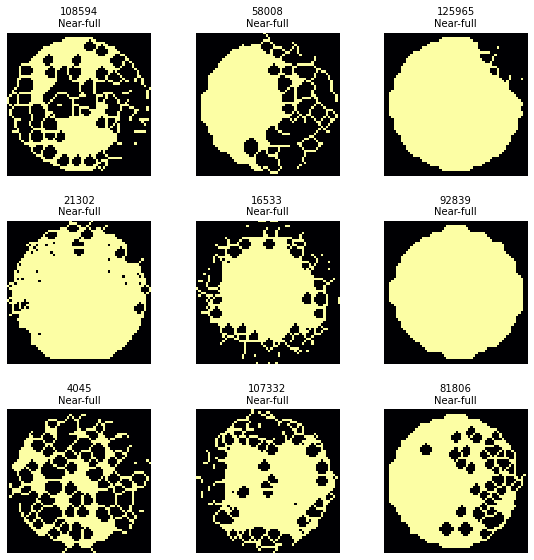

In [46]:
NF_df['thinMap'] = NF_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(NF_df, random_NF, fig_size=fig_size, col='thinMap', cmap=cmap)

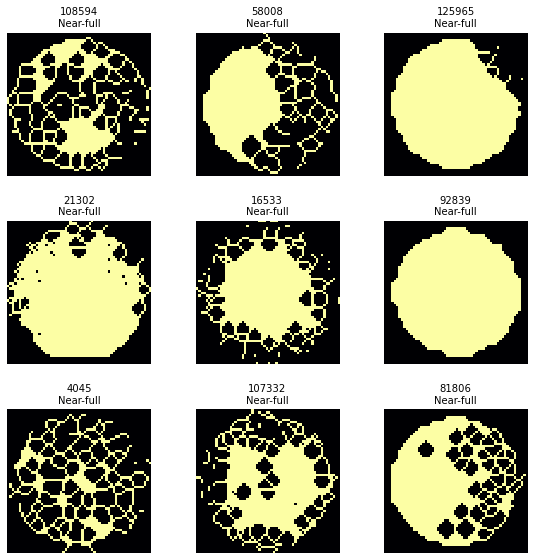

In [76]:
NF_df['thinMap'] = NF_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(NF_df, random_NF, fig_size=fig_size, col='thinMap', cmap=cmap)

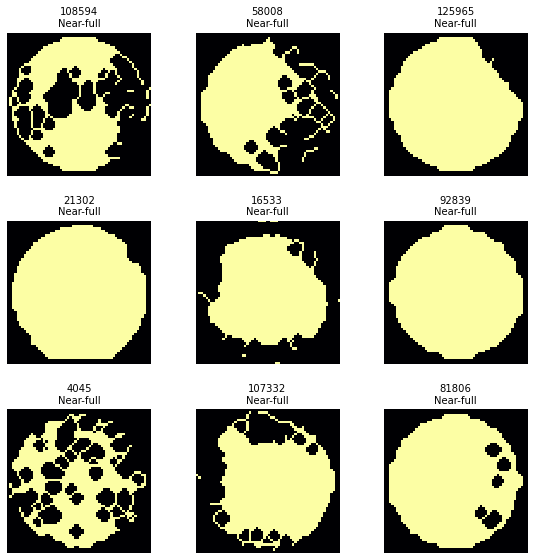

In [77]:
NF_df['fpthinMap'] = NF_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(NF_df, random_NF, fig_size=fig_size, col='fpthinMap', cmap=cmap)

donut count: 472


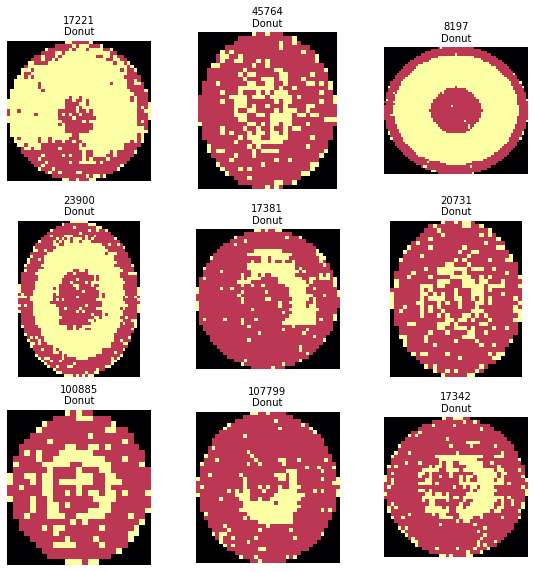

In [49]:
donut = data.index[data['failureType'] == 'Donut'].tolist()
print(f'donut count: {len(donut)}')
random_donut = random.sample(donut, number)
donut_df = data.loc[random_donut]

plot_list(data, random_donut, fig_size=fig_size, col='waferMap', cmap=cmap)

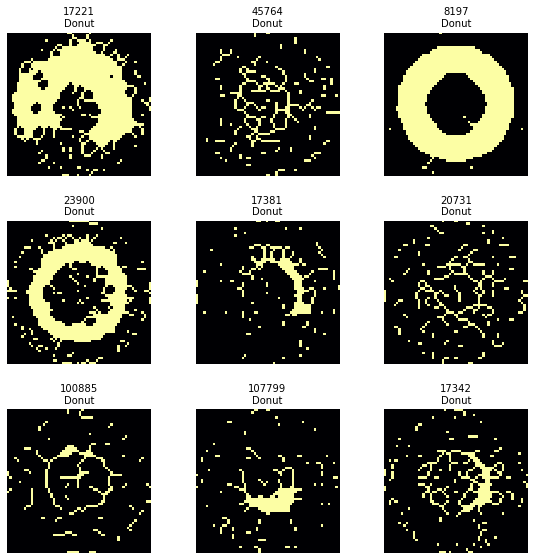

In [50]:
donut_df['thinMap'] = donut_df.binaryMap.apply(lambda x: thin(x, 2))
plot_list(donut_df, random_donut, fig_size=fig_size, col='thinMap', cmap=cmap)

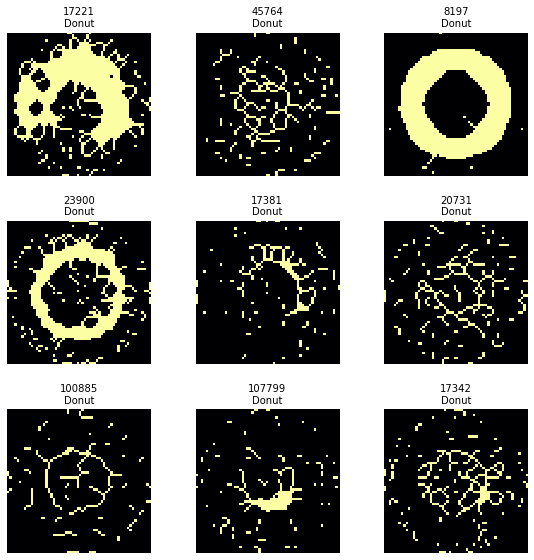

In [78]:
donut_df['thinMap'] = donut_df.binaryMap.apply(lambda x: thin(x, 3))
plot_list(donut_df, random_donut, fig_size=fig_size, col='thinMap', cmap=cmap)

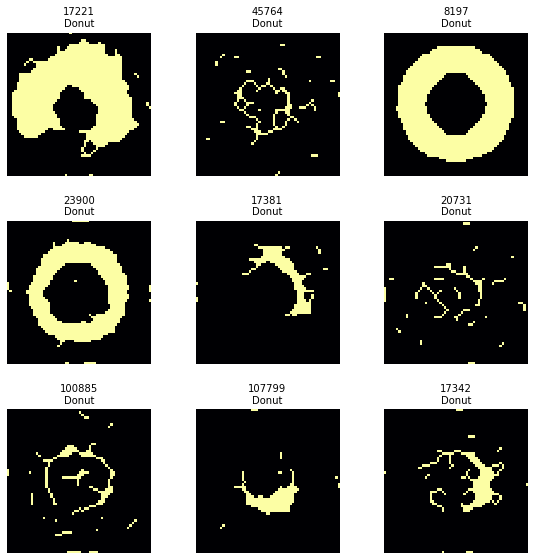

In [79]:
donut_df['fpthinMap'] = donut_df.binaryMap.apply(lambda x: thin(ndimage.median_filter(x, 3), 2))
plot_list(donut_df, random_donut, fig_size=fig_size, col='fpthinMap', cmap=cmap)